# Random Forest Classifier

In [22]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import weatherdataprocesstool as wt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

In [23]:
dataset=pd.read_pickle('/Users/benbilly3/Desktop/資策會專題/rawMaterialPricePrediction/US_Weather/US_weather_cornsArea_traindata.pickle')
dataset=dataset.drop(columns='win')
dataset

,temp,dewp,slp,stp,visib,wdsp,mxpsd,prcp,extremeClimate,SOI,ONI,return
date2,,,,,,,,,,,,
1960-10-01,67.330699,56.341969,1017.285733,979.701295,11.318394,5.287306,11.164637,0.031371,0.730769,0.7,0.3,0.986713
1960-11-01,54.260477,43.621330,1015.895226,977.766248,11.421832,5.924718,11.954969,0.026902,0.076923,0.1,0.2,0.983797
1960-12-01,41.714267,31.840078,1017.545467,978.890260,11.840726,8.000259,14.519844,0.012274,0.880000,0.5,0.1,0.917801
1961-01-01,25.787829,17.198116,1023.084000,983.486575,11.571016,7.946801,13.848306,0.012076,0.346154,0.8,0.1,1.005982
1961-02-01,22.852830,14.027799,1021.799742,982.012704,11.186164,6.846667,12.952645,0.002955,1.440000,-0.3,0.0,1.002932
1961-03-01,32.402921,24.998470,1019.129429,979.907510,9.660918,7.220862,13.298609,0.021860,0.692308,0.9,0.0,1.005929
1961-04-01,40.157519,31.178446,1014.458452,975.835589,10.910902,9.037218,15.921053,0.064238,0.807692,-1.8,0.0,0.952931
1961-05-01,45.475259,33.169171,1012.028400,973.695071,11.852461,9.083290,16.227591,0.053155,1.423077,0.8,0.1,1.058629
1961-06-01,57.168844,43.326005,1016.872387,978.883794,12.759422,8.053266,15.010553,0.051431,0.760000,0.3,0.2,1.035054


## Get dataset

In [24]:


print(dataset.shape)
dataset = dataset.dropna(thresh=int(len(dataset)*0.5), axis=1).dropna(how='any')
print(dataset.shape)

(706, 12)
(706, 12)


## Add labels

In [25]:
feature_names = list(dataset.columns)

In [26]:

dataset.head()

,temp,dewp,slp,stp,visib,wdsp,mxpsd,prcp,extremeClimate,SOI,ONI,return
date2,,,,,,,,,,,,
1960-10-01,67.330699,56.341969,1017.285733,979.701295,11.318394,5.287306,11.164637,0.031371,0.730769,0.7,0.3,0.986713
1960-11-01,54.260477,43.621330,1015.895226,977.766248,11.421832,5.924718,11.954969,0.026902,0.076923,0.1,0.2,0.983797
1960-12-01,41.714267,31.840078,1017.545467,978.890260,11.840726,8.000259,14.519844,0.012274,0.880000,0.5,0.1,0.917801
1961-01-01,25.787829,17.198116,1023.084000,983.486575,11.571016,7.946801,13.848306,0.012076,0.346154,0.8,0.1,1.005982
1961-02-01,22.852830,14.027799,1021.799742,982.012704,11.186164,6.846667,12.952645,0.002955,1.440000,-0.3,0.0,1.002932


## Split Train Test dataset

In [41]:
date_arr = dataset.index.get_level_values('date2') < '2008'
dataset_train = dataset[date_arr]
dataset_test = dataset[~date_arr]

## Training

### RandomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier

cf = RandomForestClassifier(n_estimators=5)

train = dataset_train[feature_names] , dataset_train['return'] > 1 
test = dataset_test[feature_names] , dataset_test['return'] > 1 

cf.fit(*train)
cf.score(*test)
# cf.predict(test[0])

0.9928057553956835

### Xgboost

In [43]:
import xgboost
cf_xgb = xgboost.XGBClassifier()
cf_xgb.fit(*train)
cf_xgb.score(*test)
# !pip install xgboost

0.9928057553956835

# lightgbm

## 自動調整參數

In [44]:
import lightgbm


fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}#fit參數

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 20), 
             'min_child_samples': sp_randint(10, 50), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=param_test,#枚舉調參 
    n_iter=n_HP_points_to_test,#幾種model?
    scoring='roc_auc',#模型評斷標準
    cv=3,
    refit=True,
    random_state=1,
    verbose=True)

gs.fit(*train, **fit_params)




Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't im

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.995946
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.994075
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	valid's auc: 0.997089
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.990644
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[11]	valid's auc: 0.997297
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	valid's auc: 0.99553
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	valid's auc: 0.988254
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.997817
Training until 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[2]	valid's auc: 0.997817
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.998857
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.990541
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[8]	valid's auc: 0.997713
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until valida

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.993243
Training until validation scores don't improve for 

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	valid's auc: 0.998753
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[5]	valid's auc: 0.99553
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[7]	valid's auc: 0.998753
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[2]	valid's auc: 0.998337
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.993243
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[6]	valid's auc: 0.998129
Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.993243


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        metric='None', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=5000, n_jobs=4, num_leaves=31,
        objective=None, random_state=314, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12193d518>, 'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12193d6a0>, 'min_child_weight': [1e-05, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0], 'subsample': <scipy.stats....eb8>, 'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10, 50, 100], 'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50, 100

# 找出最佳參數

In [45]:
gs.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.8111317002380557, importance_type='split',
        learning_rate=0.1, max_depth=-1, metric='None',
        min_child_samples=21, min_child_weight=0.01, min_split_gain=0.0,
        n_estimators=5000, n_jobs=4, num_leaves=10, objective=None,
        random_state=314, reg_alpha=50, reg_lambda=100, silent=True,
        subsample=0.6469518627566013, subsample_for_bin=200000,
        subsample_freq=0)

In [47]:

cf_lgbm = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.8111317002380557, importance_type='split',
        learning_rate=0.1, max_depth=-1, metric='None',
        min_child_samples=21, min_child_weight=0.01, min_split_gain=0.0,
        n_estimators=5000, n_jobs=4, num_leaves=10, objective=None,
        random_state=314, reg_alpha=50, reg_lambda=100, silent=True,
        subsample=0.6469518627566013, subsample_for_bin=200000,
        subsample_freq=0)
cf_lgbm.fit(dataset_train[feature_names],dataset_train['return'] > 1, **fit_params)
cf_lgbm.score(dataset_test[feature_names],dataset_test['return'] > 1)

Training until validation scores don't improve for 10 rounds.
Early stopping, best iteration is:
[3]	valid's auc: 0.993243


0.9928057553956835

## Prediction

In [48]:
prediction = gs.predict_proba(test[0])
#prediction = cf_lgbm.predict_proba(test[0])

prediction = prediction.swapaxes(0,1)[1]
prediction

array([0.54562658, 0.54562658, 0.54562658, 0.54562658, 0.46849841,
       0.54562658, 0.46849841, 0.46849841, 0.46849841, 0.46849841,
       0.46849841, 0.54562658, 0.46849841, 0.46849841, 0.54562658,
       0.54562658, 0.54562658, 0.46849841, 0.54562658, 0.46849841,
       0.54562658, 0.54562658, 0.54562658, 0.54562658, 0.46849841,
       0.54562658, 0.46849841, 0.54562658, 0.46849841, 0.54562658,
       0.54562658, 0.54562658, 0.54562658, 0.54562658, 0.46849841,
       0.54562658, 0.54562658, 0.54562658, 0.54562658, 0.46849841,
       0.54562658, 0.46849841, 0.54562658, 0.54562658, 0.46849841,
       0.54562658, 0.46849841, 0.54562658, 0.46849841, 0.54562658,
       0.54562658, 0.54562658, 0.46849841, 0.54562658, 0.54562658,
       0.54562658, 0.46849841, 0.46849841, 0.46849841, 0.46849841,
       0.54562658, 0.46849841, 0.46849841, 0.54562658, 0.46849841,
       0.46849841, 0.46849841, 0.54562658, 0.46849841, 0.46849841,
       0.46849841, 0.54562658, 0.54562658, 0.54562658, 0.54562

## Backtest

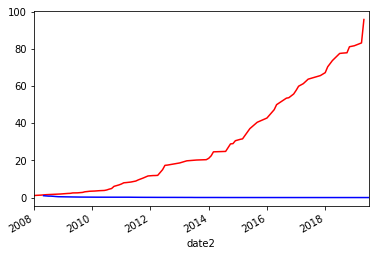

In [51]:
%matplotlib inline
returns = dataset_test['return'][prediction > 0.5]
dates = returns.index.get_level_values("date2")
returns.groupby(dates).mean().cumprod().plot(color='red')

returns = dataset_test['return'][prediction < 0.5]
dates = returns.index.get_level_values("date2")
returns.groupby(dates).mean().cumprod().plot(color='blue')